## Wine Classification

Randy French
October 2021

- You will need to download the csv file from https://archive.ics.uci.edu/ml/datasets/Wine 

Source:

Original Owners: 

Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy. 

Donor: Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au

# Executive Summary

## Goals:
- With this project I am striving to create machine learning model/s to predict the origin of wines using chemical analysis.
- Thoroughly document each step
- Make sure project is reproduceable

## My Question:
- Can the chemical makeup of wine be used to determine the cultivator/s?

## Findings:
- The best performing model is: Logistic Regression With Cross-Validation Score of: 0.96
- The Prediction accuracy on train is: 94.44

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

## Acquire and Prepare

In [2]:
df = pd.read_csv('Wine.csv')
print('shape:', df.shape)
df.head()

shape: (177, 14)


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### The columns above are given arbitrary numbers. The real column names are provide in the dataset page, I will assign the column names from the dataset page to the columns

In [3]:
# Renaming the columns based on their features
df.columns= ['type', 'alcohol', 'mailic_acid', 'ash','alkalinity_of_ash', 'magneisum',  'total_phenols', 
             'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
             'od280_od315_of_dilutedwines', 'proline']

In [4]:
# check the df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   type                         177 non-null    int64  
 1   alcohol                      177 non-null    float64
 2   mailic_acid                  177 non-null    float64
 3   ash                          177 non-null    float64
 4   alkalinity_of_ash            177 non-null    float64
 5   magneisum                    177 non-null    int64  
 6   total_phenols                177 non-null    float64
 7   flavanoids                   177 non-null    float64
 8   nonflavanoid_phenols         177 non-null    float64
 9   proanthocyanins              177 non-null    float64
 10  color_intensity              177 non-null    float64
 11  hue                          177 non-null    float64
 12  od280_od315_of_dilutedwines  177 non-null    float64
 13  proline             

In [5]:
# checking for any null values
print('There are %d missing values in total.' % df.isna().sum().sum())

There are 0 missing values in total.


In [6]:
df.head()

,type,alcohol,mailic_acid,ash,alkalinity_of_ash,magneisum,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_dilutedwines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Takeaways from acquire and prepare
- had to add column names from the data set page
- the data is clean and has no missing values

*************************************************

## Explore

In [7]:
# get summary statistics for the numeric columns
df.describe()

,type,alcohol,mailic_acid,ash,alkalinity_of_ash,magneisum,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_dilutedwines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


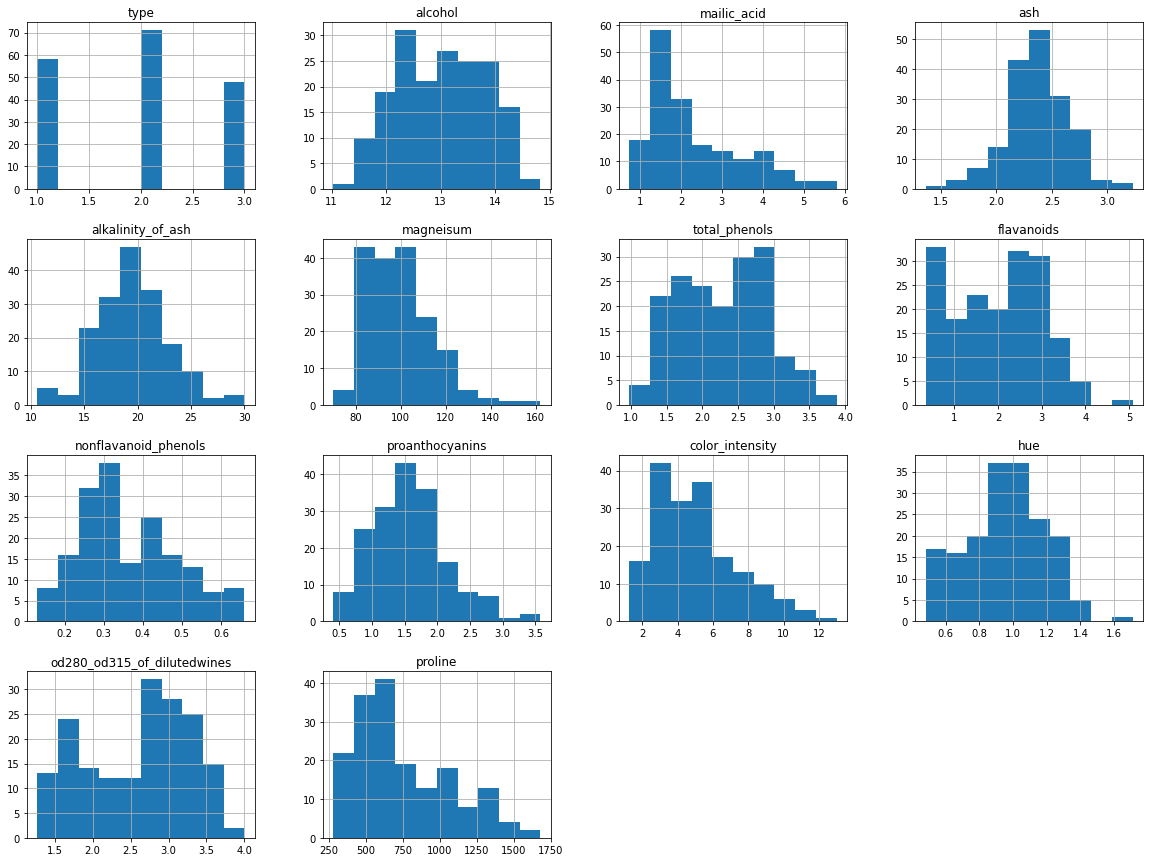

In [8]:
# Univariate exploration of the distributions with histograms

df.hist(figsize=(20, 15))
plt.show()

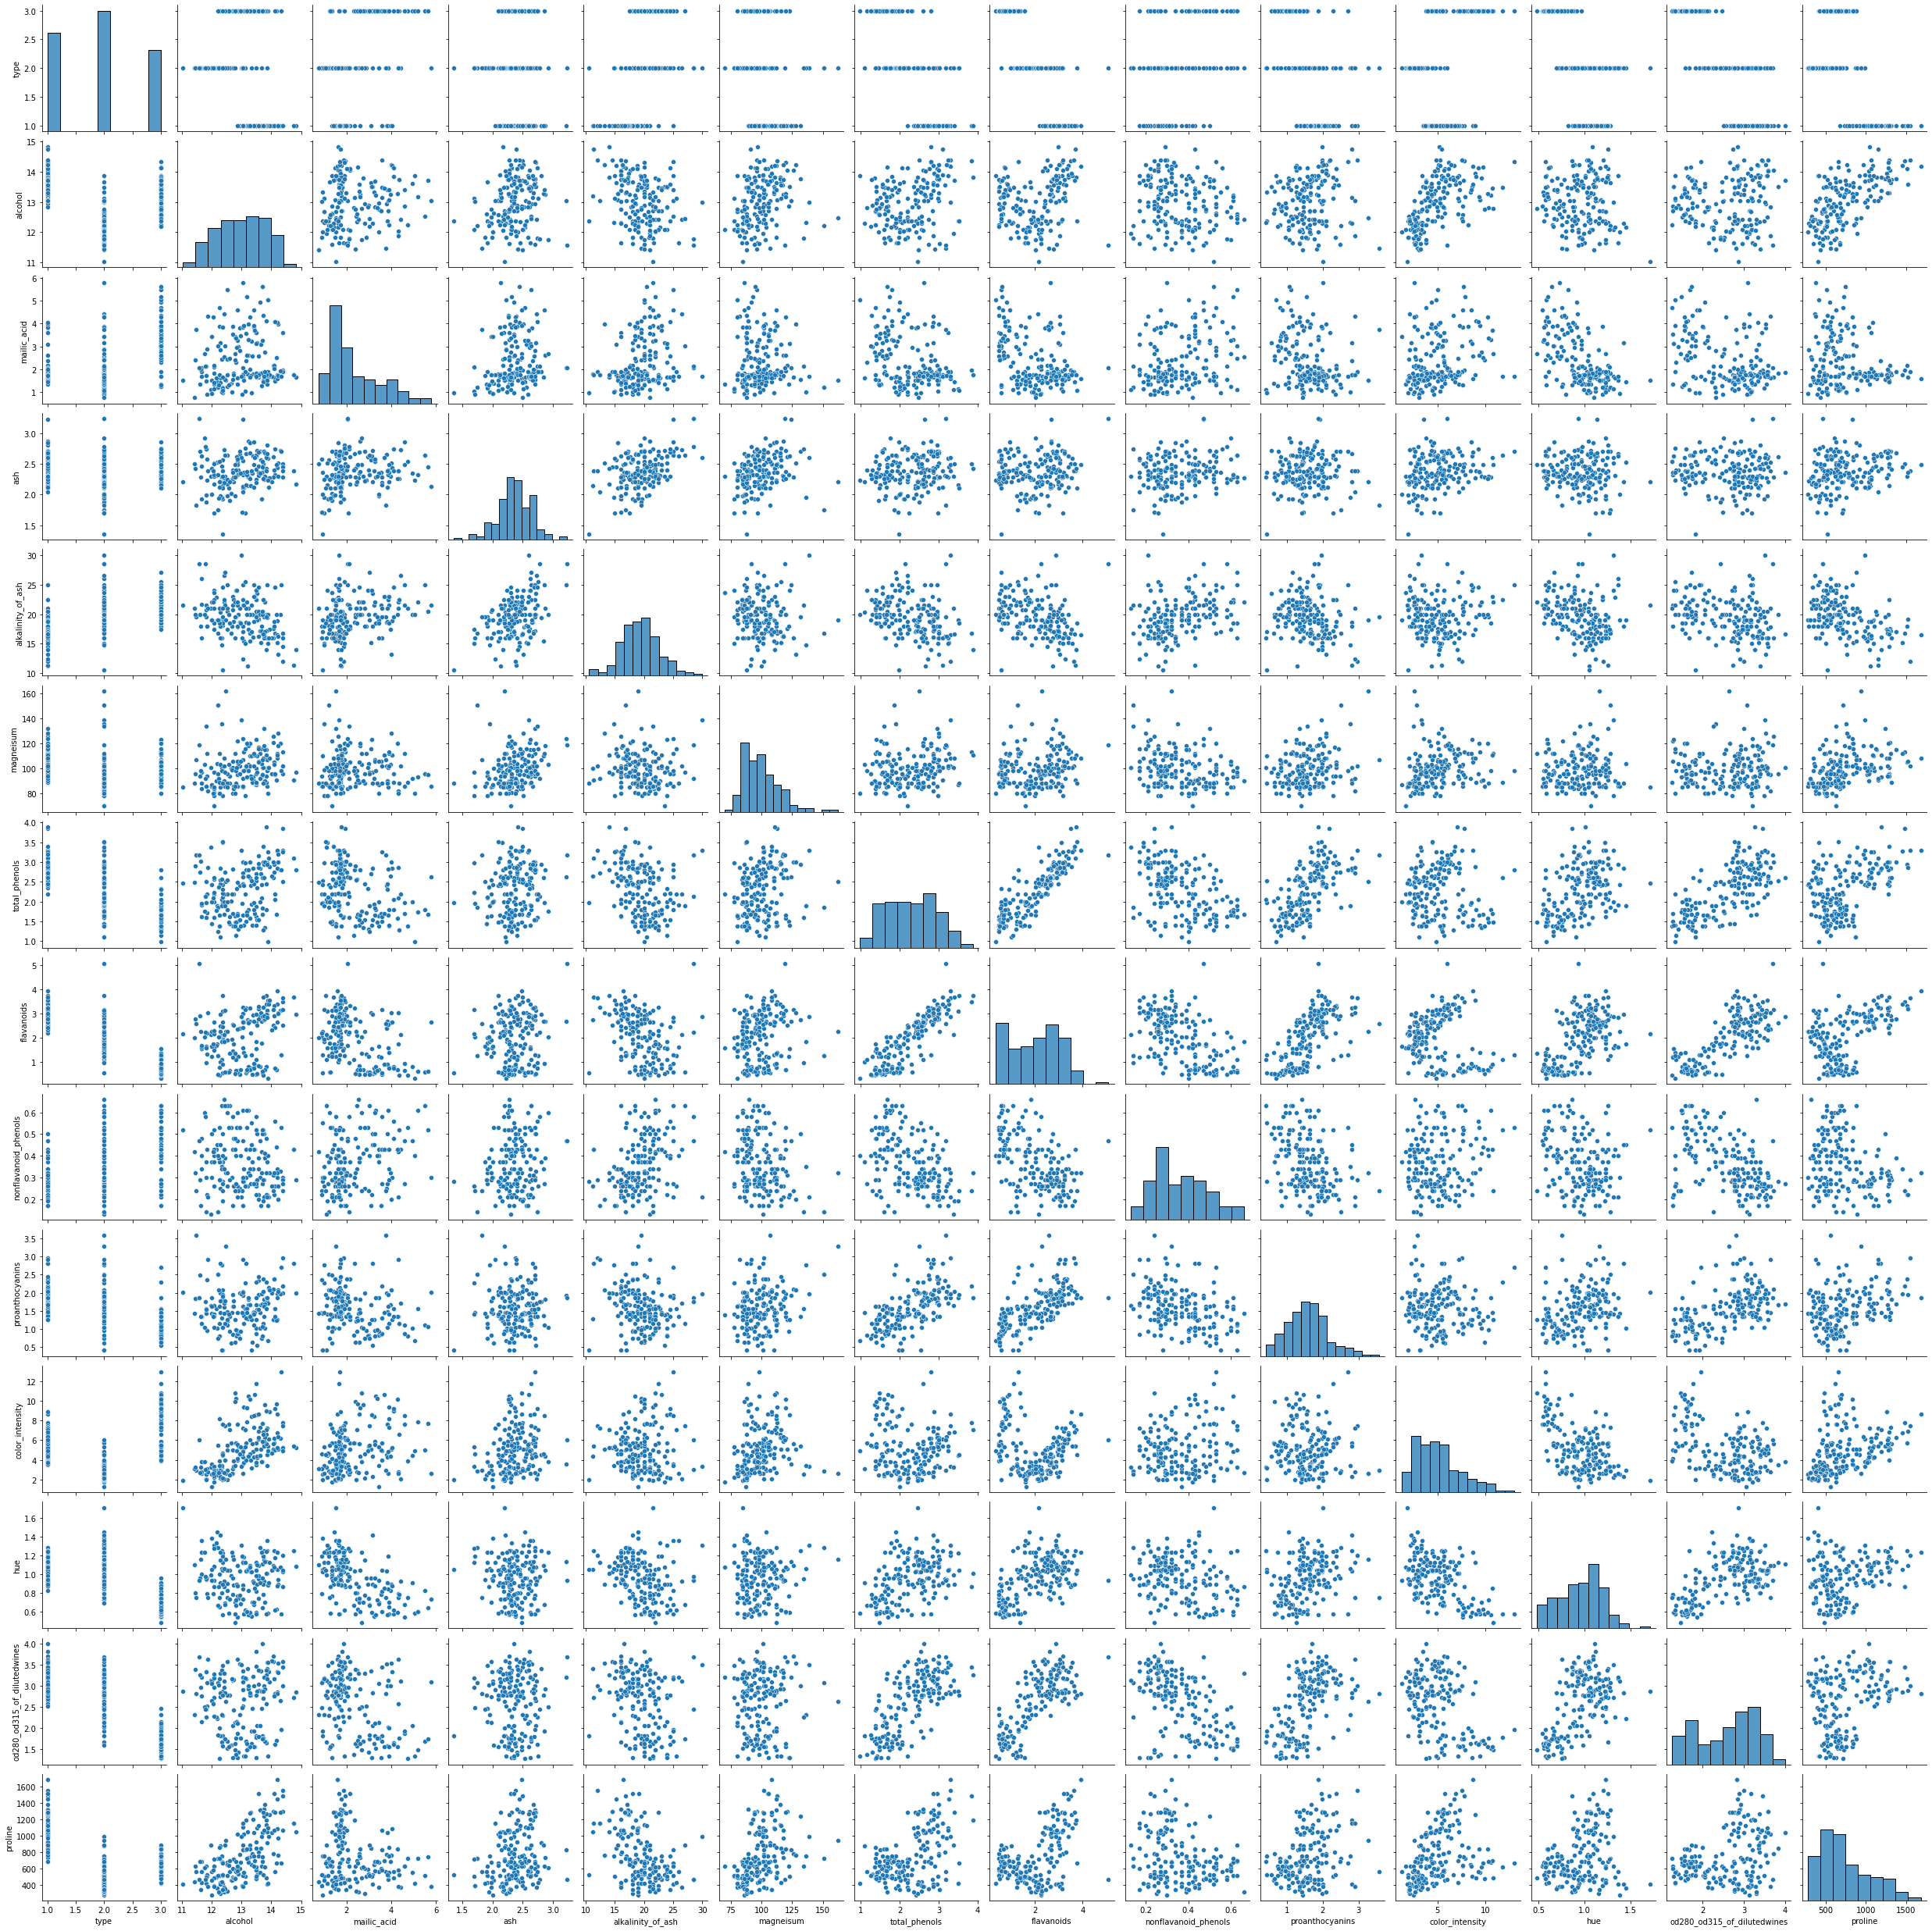

In [9]:
# Look at distribution in a pairplot
sns.pairplot(df)

In [10]:
# transpose the data for a different view
df.head().T

,0,1,2,3,4
type,1.00,1.00,1.00,1.00,1.00
alcohol,13.20,13.16,14.37,13.24,14.20
mailic_acid,1.78,2.36,1.95,2.59,1.76
ash,2.14,2.67,2.50,2.87,2.45
alkalinity_of_ash,11.20,18.60,16.80,21.00,15.20
magneisum,100.00,101.00,113.00,118.00,112.00
total_phenols,2.65,2.80,3.85,2.80,3.27
flavanoids,2.76,3.24,3.49,2.69,3.39
nonflavanoid_phenols,0.26,0.30,0.24,0.39,0.34
proanthocyanins,1.28,2.81,2.18,1.82,1.97


### Count the target wine types

In [11]:
df['type'].value_counts()

2    71
1    58
3    48
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

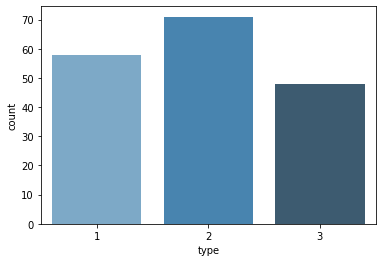

In [12]:
# get a visual of the count
sns.countplot(df['type'], palette='Blues_d')

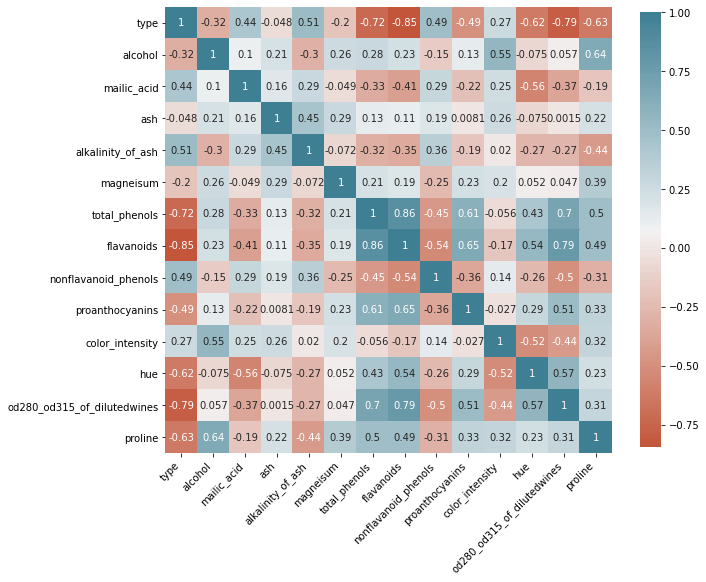

In [13]:
# get a correlation of the variables before splitting
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, cbar_kws={'shrink': .8})
ax.set_xticklabels(df.columns, rotation=45, horizontalalignment='right');

### Takeaways from Explore:
- Have 3 types of wine
- several of the variables are fairly evenly distributed. alcohol, ash, alkalinity_of_ash, proanthocyanins and hue
- total_phenols, flavanoids and od280_0d315_of_dilutedwines are the most correlated

**************
## Split for more exploration and testing

In [14]:
# seperate the variables and the target from the original dataset
X = df.drop(['type'], axis=1)
Y = df['type']

### I will use the train_test_split() from sklearn.model_selection to split it further into training and testing subsets

### The train_test_split() function takes the following arguments:
- X: the variables, the whole dataset, without the target variable (wine type)
- Y: the target variable, which is the wine type
- test_size: represents the proportion of the original data to be used as the testing set (here I chose 20%)
- shuffle: since the original dataset is grouped by the wine class, it is preferable to re-arrange everything randomly, so I set shuffle to True.

In [15]:
random_state = 123
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state, shuffle=True)

## Feature Elimination

Some variables may not be predictive for the target wine type, so I will use feature elimination to try to eliminate them in order to improve the data quality we will feed into the model

In [16]:
estimator = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
selector = RFECV(estimator, step=1, cv = StratifiedKFold(10));
selector.fit(X, Y);

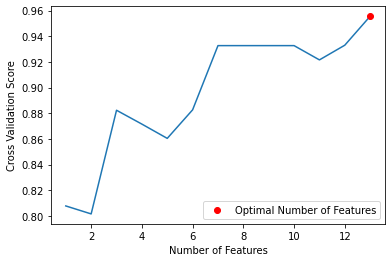

In [17]:
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Score')
grid_scores = plt.plot(range(1, len(selector.grid_scores_) +1), selector.grid_scores_, zorder = 3);
best_number = plt.scatter(selector.n_features_, np.max(selector.grid_scores_), color = 'red', zorder = 5);
plt.legend([best_number], ['Optimal Number of Features'], loc = 'lower right');

### Recursive Feature Elimination didn't eliminate any feature, so apparently all the features contribute to the classification. I will not delete any. 

*************************************************

## Building the models

It is always good to use as many classifiers and compare the results, then pick the one with the best accuracy. Different algorithms may perform differently on different datasets. I will try the following models:
- Logistic Regression
- Support Vector Classifer
- K-Nearest Neighbors
- Decision Tree

### Import the needed classifiers:

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Build a list containing the name of the classifier and the classifier itself:

In [19]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='auto')))
classifiers.append(('Support Vector Classifier', SVC(kernel='linear')))
classifiers.append(('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3)))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))


## Model Ranking

To evaluate the performace of our models, I will use the cross_val_score() function. Which will perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.


In [20]:
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_results = []
for name, classifier in classifiers:
    result = cross_val_score(classifier, X, Y, cv=kfold);
    cv_results.append((name, result));

In [21]:
results = pd.DataFrame(cv_results, columns=['classifier','cvscore'])
results['cvscore'] = [np.mean(i) for i in results['cvscore']]

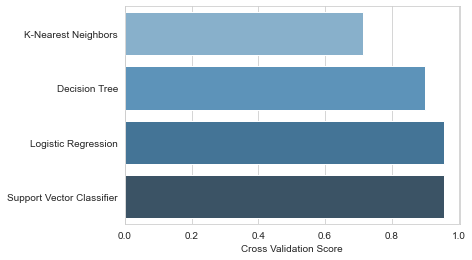

In [22]:
sns.set_style('whitegrid')
ax = sns.barplot(x='cvscore',y='classifier', data=results.sort_values('cvscore'), palette='Blues_d')
ax.set(xlabel='Cross Validation Score', ylabel='');

In [26]:
print('The best performing model is: %s\nWith Cross-Validation Score of: %.2f' % (results.iloc[results['cvscore']
     .idxmax()][0], results.iloc[results['cvscore'].idxmax()][1]))

The best performing model is: Logistic Regression
With Cross-Validation Score of: 0.96


### The result is that Logistic Regression scored the highest, it will be the model to test on.

- I will use the training split that was created earlier in order to train the model, then will use it to predict the type of testing samples:

In [24]:
estimator = LogisticRegression()
estimator.fit(X_train, Y_train)
Y_predict = estimator.predict(X_test)

- To evaluate the accuracy of the predictions, will use the accuracy_score():

In [25]:
from sklearn.metrics import accuracy_score
print('Prediction accuracy is: %.2f' % (100*accuracy_score(Y_predict, Y_test)))

Prediction accuracy is: 94.44


## Conclusion/Final Takeaway:
- Overall the Logistic Regression model performed the best on this data set
- This dataset did not need any cleanup and was a simple data set
- The dataset left much to be desired as far as what the types represented other than from three different growers, as stated on the UCI page:Data Set Information:

"These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

"I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set." 

"The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it)"

- I tried a different, shorter approach in feature selection/elimination and modeling to see how it compared to what I have done in previous projects.
- I found that I like the approach that I have been using in past projects, that are much more in detail, at least at this stage of my learning process.

******************************************

## Next Steps/If I had more time:
- I would look for a more robust data set, that needed some cleanup
- I would take the longer approach as I have done in my past projects.

*************************************************

## Project Summary:
This was a project that I was able to pick for myself. Wine classification. I used a dataset from the UCI Machine Learning Repository. Using chemical analysis to determine the origin of wines. There is so much data out in the public domain to evaluate, that I had a hard time trying to choose what to pick. However, I do like wine, so thought it would be a good project to undertake. I only had a small amount of time to pick and move on and this was the one that I found. Of the four supervised machine learning models I tested, the Logistic Regression Model performed the best. Take a look and see what you think.

I look forward to learning more as I move forward with my time at Codeup.